In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np

auto_price = pd.read_csv(r"/Users/zoyasyed/Downloads/DataScienceEssential_Module3/IU4/Automobile_price_data__Raw_.csv")
## Convert some columns to numeric values
auto_price.shape
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for i in cols:
    auto_price.loc[auto_price[i]=='?',i]=np.nan
auto_price.dropna(axis=0,inplace=True)
for i in cols:
    auto_price[i]=pd.to_numeric(auto_price[i])

#auto_price[cols] = auto_price[cols].apply(pd.to_numeric, args=('coerce',))

In [2]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    object 
 2   make               195 non-null    object 
 3   fuel-type          195 non-null    object 
 4   aspiration         195 non-null    object 
 5   num-of-doors       195 non-null    object 
 6   body-style         195 non-null    object 
 7   drive-wheels       195 non-null    object 
 8   engine-location    195 non-null    object 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    object 
 15  num-of-cylinders   195 non-null    object 
 16  engine-size        195 non

Text(0, 0.5, 'Numer of autos')

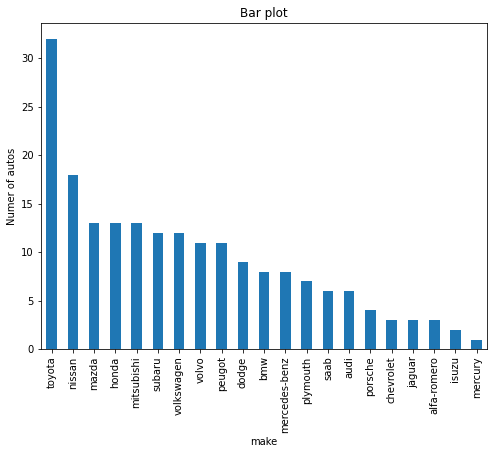

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
count=auto_price['make'].value_counts()
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
count.plot.bar(ax=ax)
ax.set_title("Bar plot")
ax.set_xlabel("make")
ax.set_ylabel("Numer of autos")

Text(0.5, 0, 'Price Of Car')

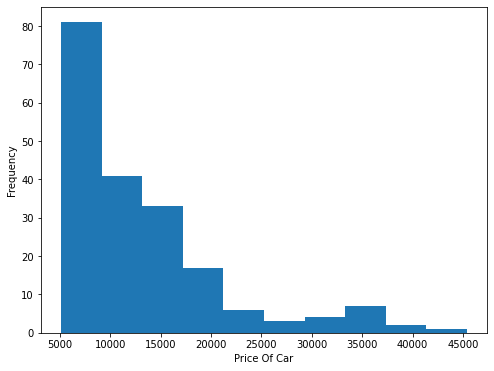

In [4]:
fig=plt.figure(figsize=(8,6))#Define plot area
ax=fig.gca()#Define axis
auto_price['price'].plot.hist(ax=ax)
ax.set_xlabel("Price Of Car")

<AxesSubplot:title={'center':'price'}, xlabel='[fuel-type]'>

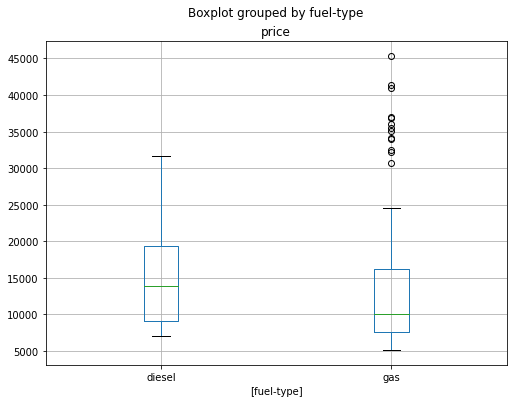

In [5]:
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
auto_price[['fuel-type','price']].boxplot(by='fuel-type',ax=ax)

<AxesSubplot:ylabel='Density'>

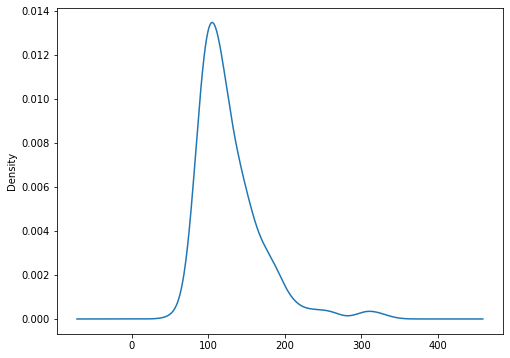

In [6]:
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
auto_price['engine-size'].plot.density(ax=ax)

<AxesSubplot:xlabel='engine-size', ylabel='Density'>

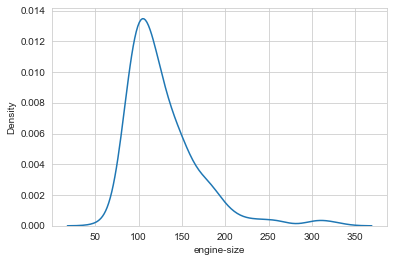

In [7]:
import seaborn as sns
sns.set_style("whitegrid")
sns.kdeplot(auto_price['engine-size'])

Text(0.5, 1.0, 'Kernal Density Plot')

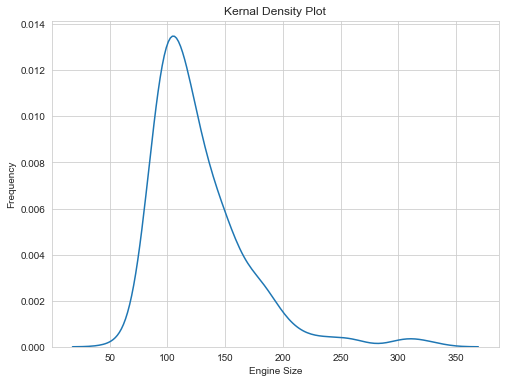

In [8]:
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
sns.set_style("whitegrid")
sns.kdeplot(auto_price['engine-size'],ax=ax)
ax.set_xlabel("Engine Size")
ax.set_ylabel("Frequency")
ax.set_title("Kernal Density Plot")

Text(0.5, 1.0, 'Violin plot for Fuel Types')

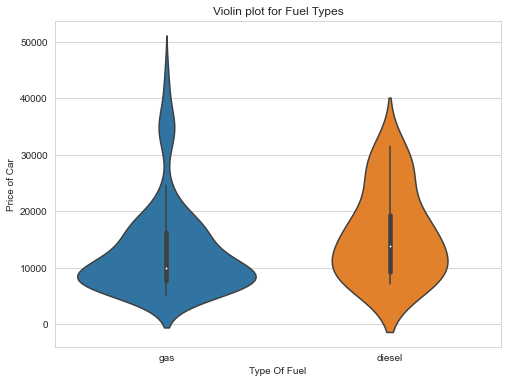

In [9]:
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x='fuel-type',y='price',data=auto_price,ax=ax)
ax.set_xlabel('Type Of Fuel')
ax.set_ylabel('Price of Car')
ax.set_title("Violin plot for Fuel Types")

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

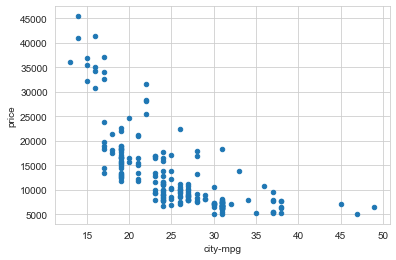

In [10]:
#Two dimension plots
auto_price.plot(kind='scatter',x='city-mpg',y='price')

Text(0, 0.5, 'Price of Car')

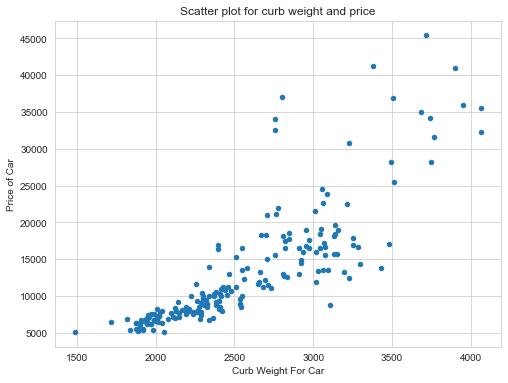

In [11]:
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
auto_price.plot(kind='scatter',x='curb-weight',y='price',ax=ax)
ax.set_title("Scatter plot for curb weight and price")
ax.set_xlabel("Curb Weight For Car")
ax.set_ylabel("Price of Car")

/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price of car')

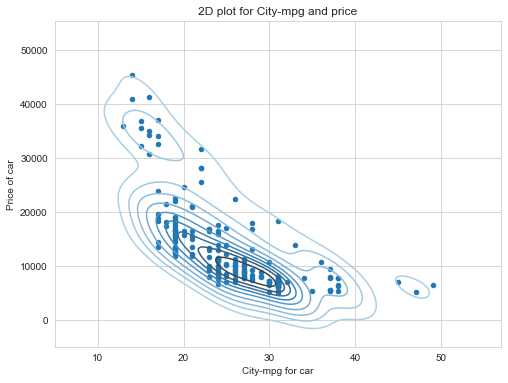

In [18]:
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
sns.set_style("whitegrid")
sns.kdeplot(auto_price['city-mpg'],auto_price['price'],ax=ax,cmap="Blues_d")
auto_price.plot(kind='scatter',x='city-mpg',y='price',ax=ax)
ax.set_title("2D plot for City-mpg and price")
ax.set_xlabel("City-mpg for car")
ax.set_ylabel("Price of car")


In [13]:
#Line Plot
import pandas as pd
x=list(range(100))
y=[z*z for z in range(100)]
df=pd.DataFrame({'x':x,'y':y})
df



,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
...,...,...
95,95,9025
96,96,9216
97,97,9409
98,98,9604


Text(0.5, 1.0, 'Line plot for x and square of x')

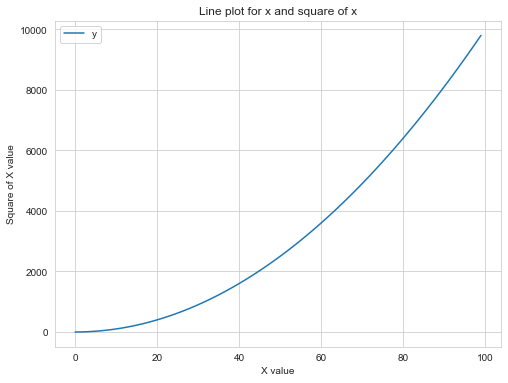

In [19]:
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
df.plot(x='x',y='y',ax=ax)
ax.set_xlabel("X value")
ax.set_ylabel("Square of X value")
ax.set_title("Line plot for x and square of x")

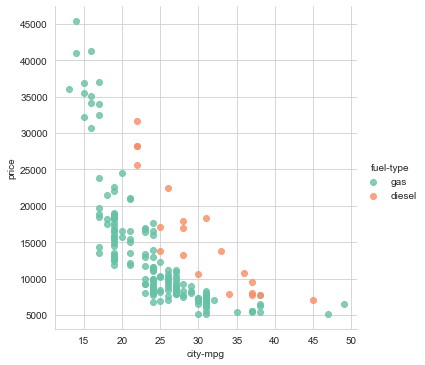

In [20]:
#Multiple Plots
sns.lmplot(x='city-mpg',y='price',data=auto_price,hue='fuel-type',palette='Set2',fit_reg=False)

'Done'

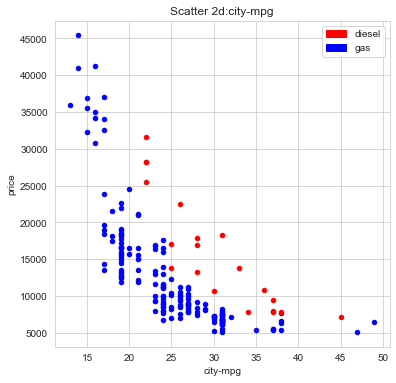

In [25]:
def auto_color(df,plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mapatches
    for col in plot_cols:
        fig=plt.figure(figsize=(6,6))
        ax=fig.gca()
        temp1=auto_price.loc[auto_price['fuel-type']=='gas']
        temp2=auto_price.loc[auto_price['fuel-type']=='diesel']
        if temp1.shape[0]>0:
            temp1.plot(kind='scatter',x=col,y='price',ax=ax,color='blue')
            if temp2.shape[0]>0:
                temp2.plot(kind='scatter',x=col,y='price',ax=ax,color='red')
    ax.set_title("Scatter 2d:"+col)
    red_patch=mapatches.Patch(color='red',label='diesel')
    blue_patch=mapatches.Patch(color='blue',label='gas')
    plt.legend(handles=[red_patch,blue_patch])
    return "Done"
auto_color(auto_price,['city-mpg'])
        

'Done'

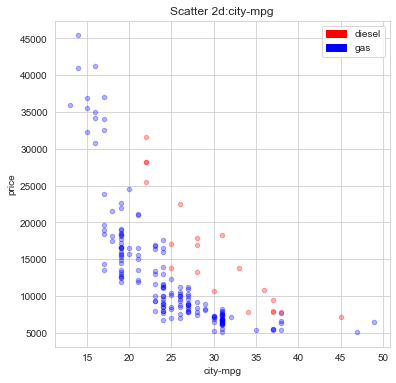

In [27]:
def auto_color(df,plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mapatches
    for col in plot_cols:
        fig=plt.figure(figsize=(6,6))
        ax=fig.gca()
        temp1=auto_price.loc[auto_price['fuel-type']=='gas']
        temp2=auto_price.loc[auto_price['fuel-type']=='diesel']
        if temp1.shape[0]>0:
            temp1.plot(kind='scatter',x=col,y='price',ax=ax,color='blue',alpha=.3)
            if temp2.shape[0]>0:
                temp2.plot(kind='scatter',x=col,y='price',ax=ax,color='red',alpha=.3)
    ax.set_title("Scatter 2d:"+col)
    red_patch=mapatches.Patch(color='red',label='diesel')
    blue_patch=mapatches.Patch(color='blue',label='gas')
    plt.legend(handles=[red_patch,blue_patch])
    return "Done"
auto_color(auto_price,['city-mpg'])

/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/sea

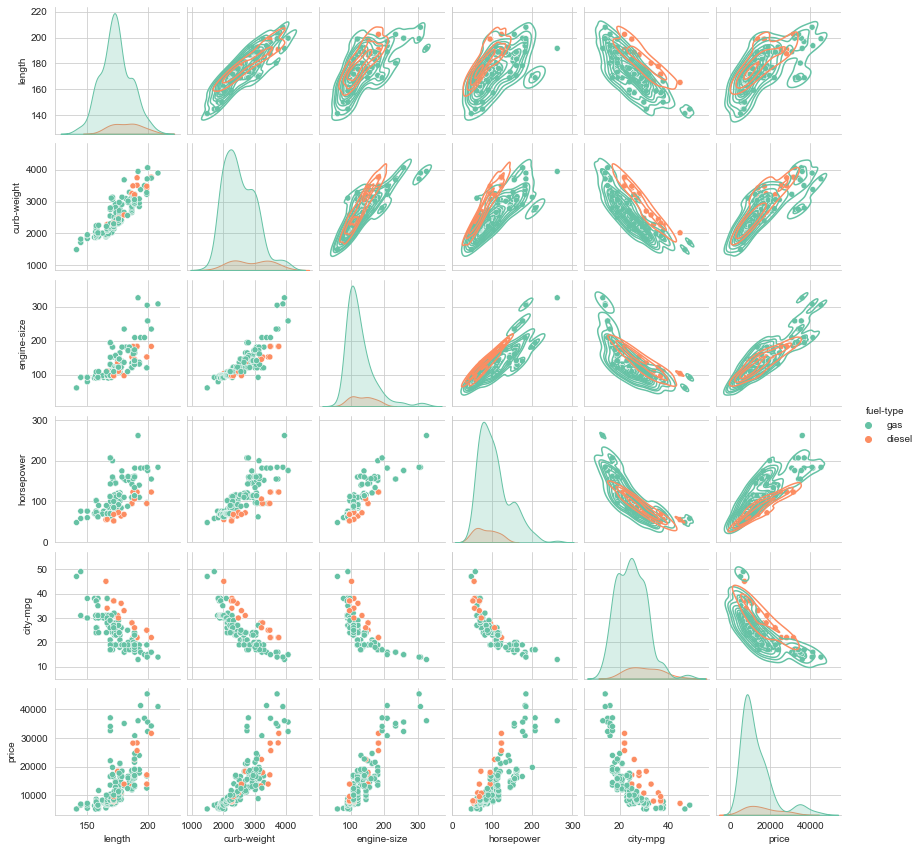

In [44]:
num_col=["length","curb-weight","engine-size","horsepower","city-mpg","price","fuel-type"]
sns.pairplot(auto_price[num_col],hue='fuel-type',palette="Set2",diag_kind="kde",size=2).map_upper(sns.kdeplot,cmap="Blues_d")

/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

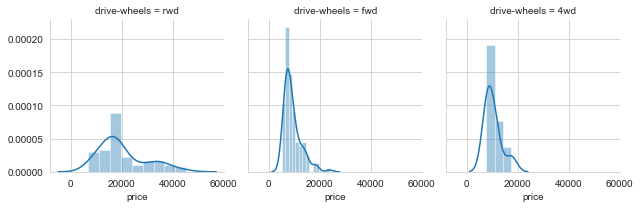

In [45]:
g=sns.FacetGrid(auto_price,col='drive-wheels')
g.map(sns.distplot,'price')

/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

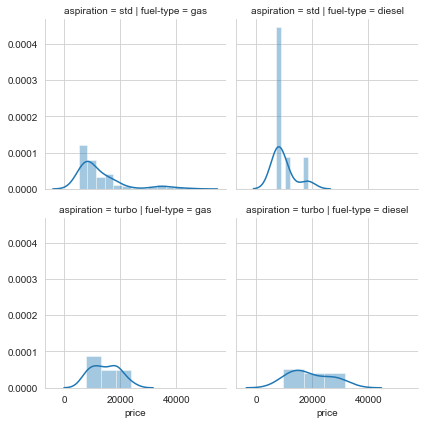

In [46]:
g=sns.FacetGrid(auto_price,col='fuel-type',row='aspiration')
g.map(sns.distplot,'price')

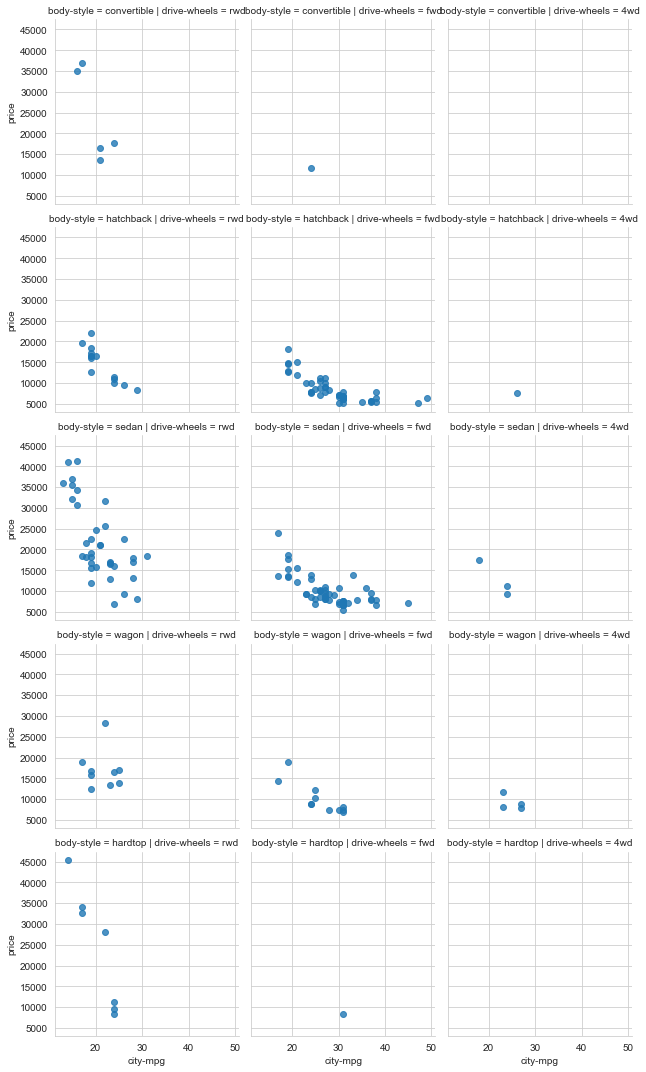

In [47]:
g=sns.FacetGrid(auto_price,col='drive-wheels',row='body-style')
g.map(sns.regplot,'city-mpg','price',fit_reg=False)

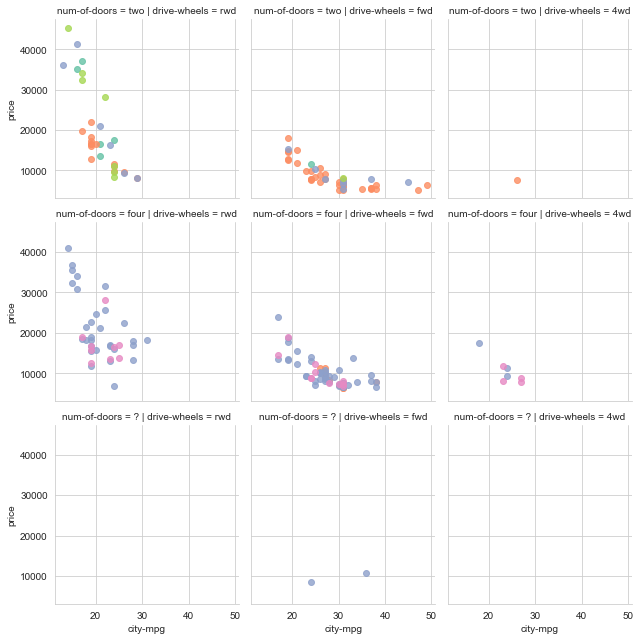

In [48]:
g=sns.FacetGrid(auto_price,col='drive-wheels',row='num-of-doors',hue='body-style',palette='Set2')
g.map(sns.regplot,'city-mpg','price',fit_reg=False)

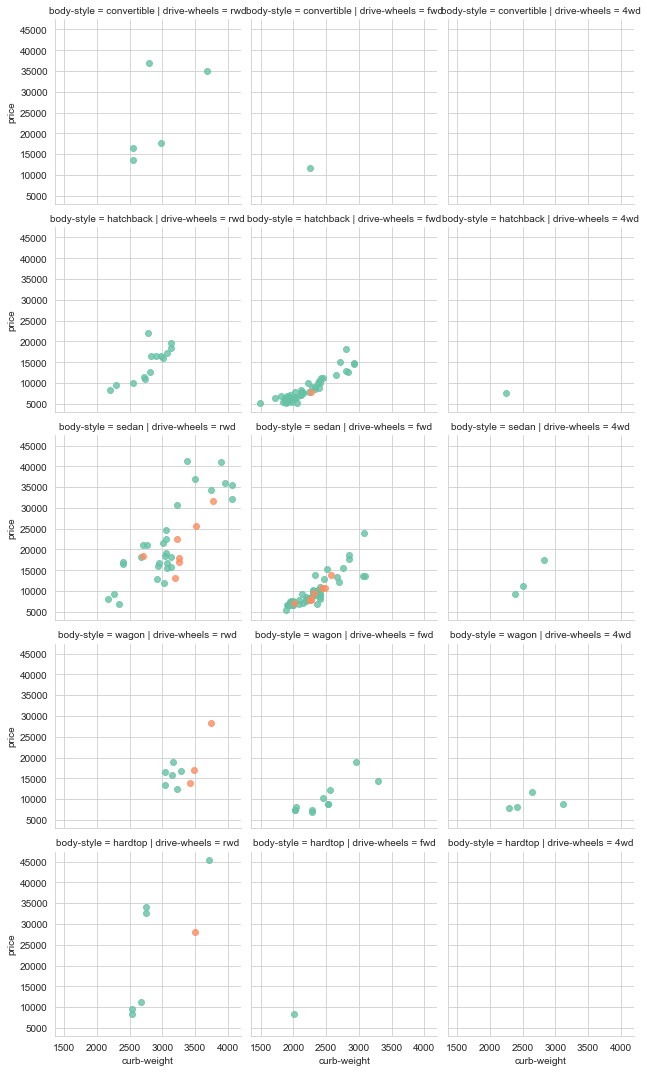

In [49]:
g=sns.FacetGrid(auto_price,col='drive-wheels',row='body-style',hue='fuel-type',palette='Set2')
g.map(sns.regplot,'curb-weight','price',fit_reg=False)